Chapter 8
# 有漂移
Book_6《数据有道》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
N_steps = 200; 
# number of steps
N_paths = 500;
# number of paths
sigma = 1
delta_t = 1
mu = 0.2

In [3]:
delta_X = np.random.normal(loc=0.0, scale=sigma*np.sqrt(delta_t), size=(N_steps,N_paths))
delta_X = delta_X + delta_t*mu
t_n = np.linspace(0,N_steps,N_steps+1,endpoint = True)*delta_t

X = np.cumsum(delta_X, axis = 0); 
X_0 = np.zeros((1,N_paths))
X = np.vstack((X_0,X))

C:\Users\james\AppData\Local\Temp\ipykernel_9428\2194215584.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(X[-1], rug=True, rug_kws={"color": "k",


(-20.0, 100.0)

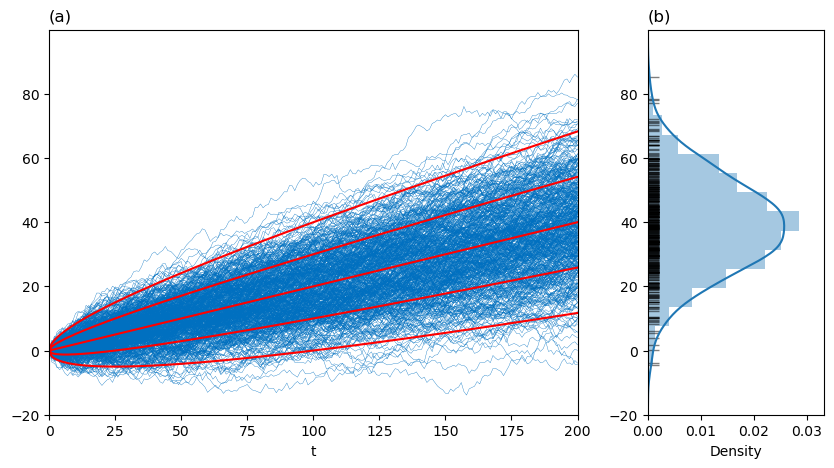

In [4]:
rows = 1
cols = 2

fig, (ax1, ax2) = plt.subplots(rows, cols, figsize=(10,5), gridspec_kw={'width_ratios': [3, 1]})

ax1.plot(t_n, X, lw=0.25,color = '#0070C0')
ax1.plot(t_n, mu*t_n,color = 'r')
ax1.plot(t_n, sigma*np.sqrt(t_n) + mu*t_n,color = 'r')
ax1.plot(t_n, -sigma*np.sqrt(t_n) + mu*t_n,color = 'r')
ax1.plot(t_n, 2*sigma*np.sqrt(t_n) + mu*t_n,color = 'r')
ax1.plot(t_n, -2*sigma*np.sqrt(t_n) + mu*t_n,color = 'r')
ax1.set_xlim([0,N_steps])
ax1.set_ylim([-20,100])
ax1.set_yticks([-20, 0, 20, 40, 60, 80])
ax1.set_title('(a)', loc='left')
ax1.set_xlabel('t')

ax2 = sns.distplot(X[-1], rug=True, rug_kws={"color": "k", 
                                                "alpha": 0.5, 
                                                "height": 0.06, 
                                                "lw": 0.5}, 
                   vertical=True, label='(b)', bins = 15)
ax2.set_yticks([-20, 0, 20, 40, 60, 80])
ax2.set_title('(b)', loc='left')
ax2.set_ylim([-20,100])

C:\Users\james\AppData\Local\Temp\ipykernel_9428\2193952966.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_i,rug=True, ax = axs[i],bins = 15,
C:\Users\james\AppData\Local\Temp\ipykernel_9428\2193952966.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_i,rug=True, ax = axs[i],bins = 

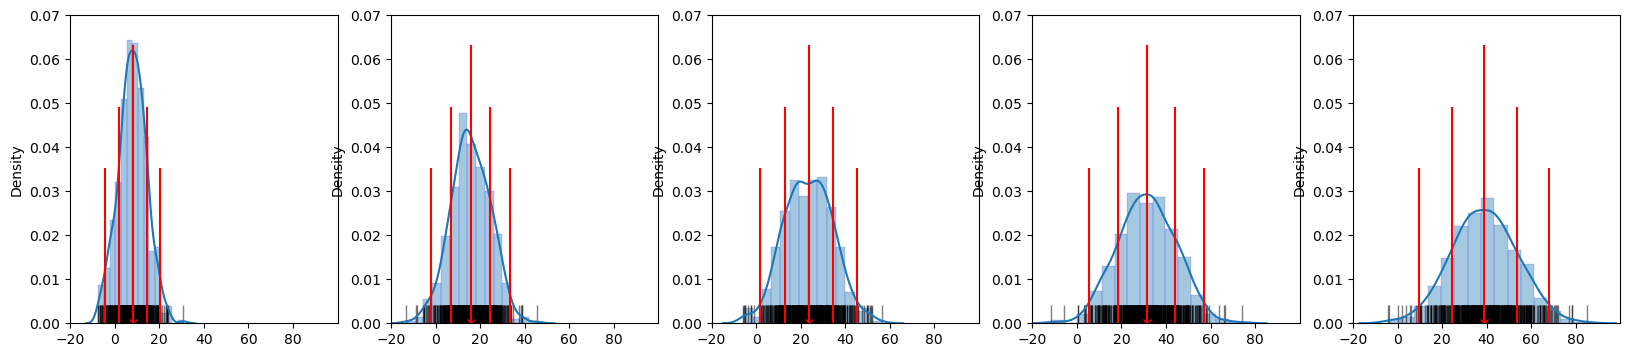

In [5]:
#%% Snapshots at various time stamps

fig, axs = plt.subplots(1, 5, figsize=(20,4))


for i in np.linspace(0,4,5):
    i = int(i)
    X_i = X[int(i + 1)*40]
    E_X_i = X_i.mean()
    std_X_i = X_i.std()
    
    sns.distplot(X_i,rug=True, ax = axs[i],bins = 15,
                 hist_kws=dict(edgecolor="b", linewidth=0.25),
                 rug_kws={"color": "k", "alpha": 0.5, 
                          "height": 0.06, "lw": 0.5})
    
    axs[i].plot(E_X_i, 0, 'xr')
    axs[i].axvline(x = E_X_i, color = 'r', ymax = 0.9)
    axs[i].axvline(x = E_X_i + std_X_i, color = 'r', ymax = 0.7)
    axs[i].axvline(x = E_X_i - std_X_i, color = 'r', ymax = 0.7)
    axs[i].axvline(x = E_X_i + 2*std_X_i, color = 'r', ymax = 0.5)
    axs[i].axvline(x = E_X_i - 2*std_X_i, color = 'r', ymax = 0.5)
    axs[i].set_xticks([-20, 0, 20, 40, 60, 80])
    axs[i].set_xlim([-20,100])
    axs[i].set_ylim([0,0.07])